# _PCA_

## _Task 1: Exploratory Data Analysis (EDA):_

### 1.	Load the dataset and perform basic data exploration.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [41]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\DS_Assignments\Assignment_9-PCA\PCA\wine.csv")
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [43]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [44]:
data.shape

(178, 14)

### 2. Examine the distribution of features

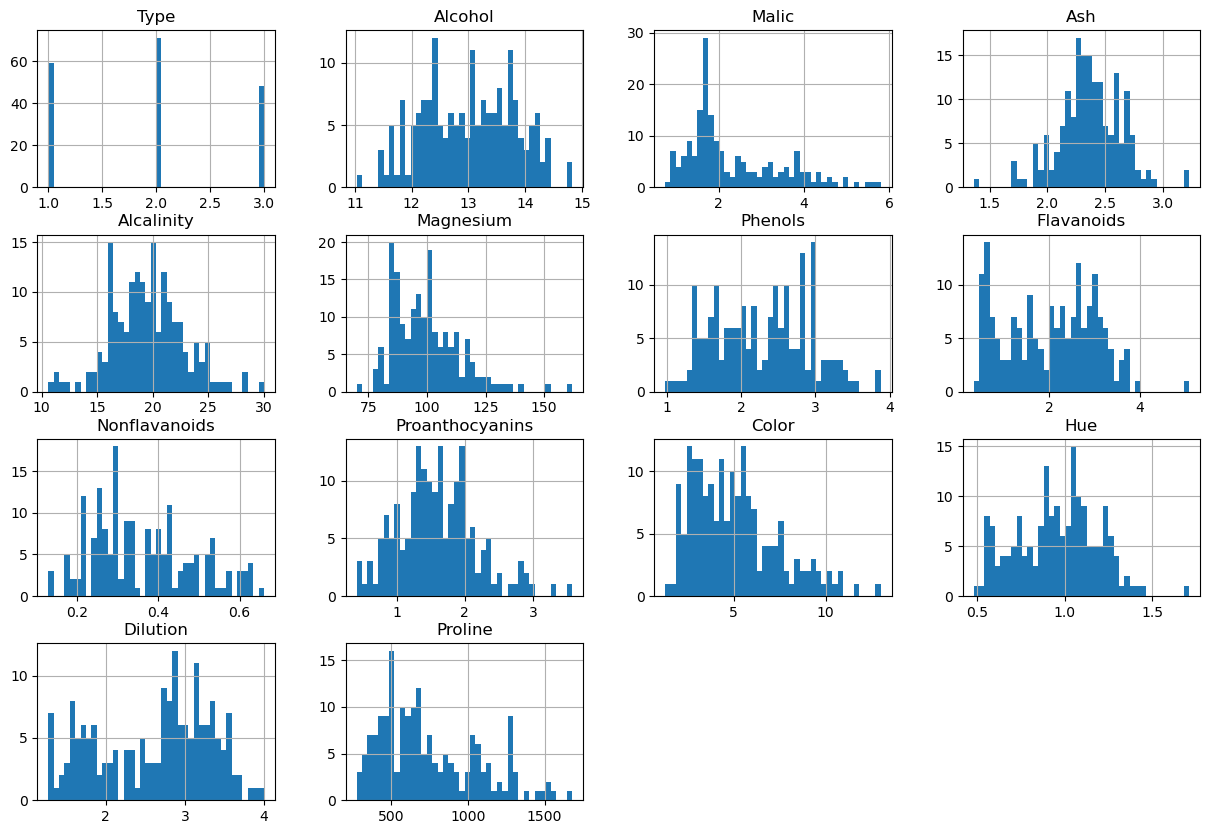

In [45]:
data.hist(bins=40 ,figsize=(15, 10))
plt.show()

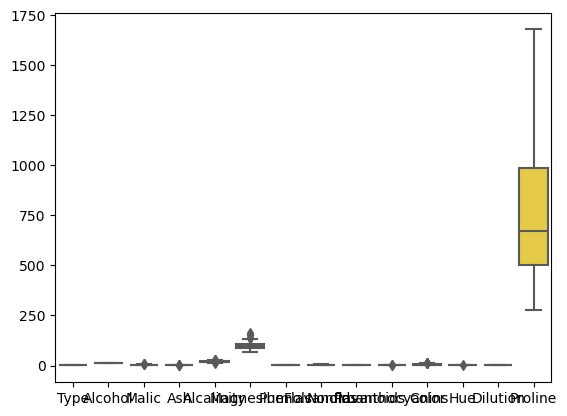

In [46]:
sns.boxplot(data=data, orient="v", palette="Set2")
plt.show()

### # 3. Investigate correlations

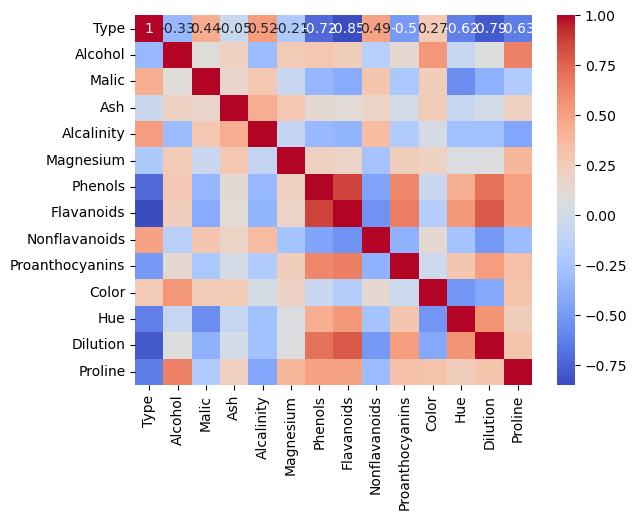

In [47]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## _Task 2: Dimensionality Reduction with PCA:_

###  1. Standardize the features

In [48]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [49]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### . Implement PCA

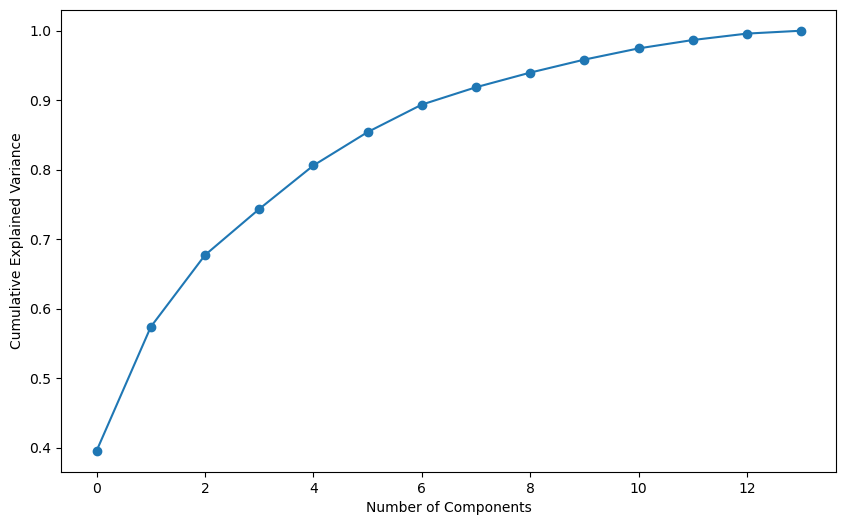

In [50]:
pca = PCA()
pca.fit(scaled_data)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

       

### 2 .Determine the optimal number of principal components

In [51]:
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1  # Choose 95% variance


### 3.	Transform the original dataset into the principal components.

In [52]:
pca = PCA(n_components=num_components)
pca_data = pca.fit_transform(scaled_data)


## _Task 3: Clustering with Original Data:_

###  1. Apply K-means clustering

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
original_clusters = kmeans.fit_predict(scaled_data)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


###  2. Visualize clustering results

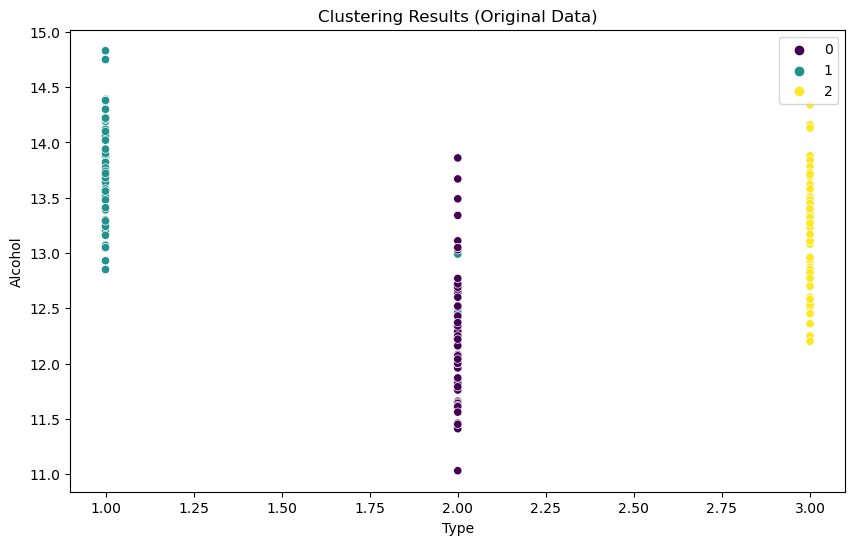

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=original_clusters, palette='viridis')
plt.title('Clustering Results (Original Data)')
plt.show()

###  3. Evaluate clustering performance

In [55]:
silhouette_orig = silhouette_score(scaled_data, original_clusters)
db_index_orig = davies_bouldin_score(scaled_data, original_clusters)
print(f'Silhouette Score (Original Data): {silhouette_orig}')
print(f'Davies-Bouldin Index (Original Data): {db_index_orig}')


Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


## _Task 4: Clustering with PCA Data:_

### 1.Apply the same clustering algorithm to the PCA-transformed dataset.

In [56]:
pca_clusters = kmeans.fit_predict(pca_data)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2. Visualize clustering results

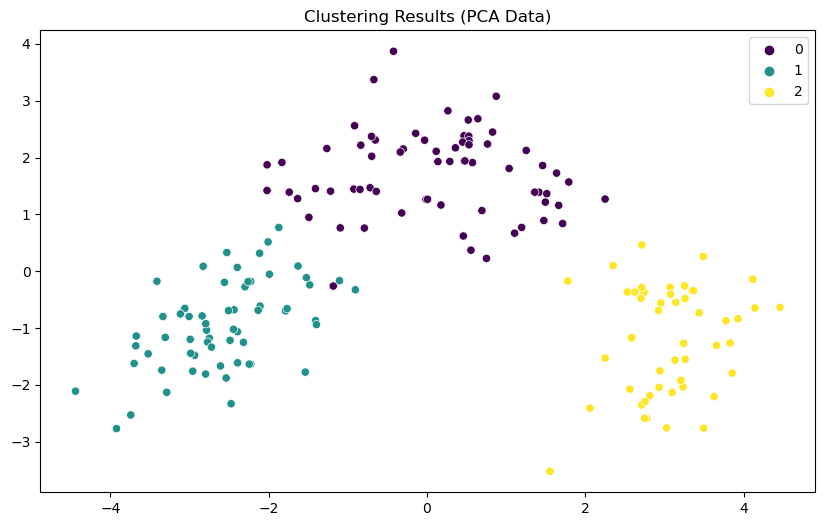

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis')
plt.title('Clustering Results (PCA Data)')
plt.show()

###  3. Evaluate clustering performance

In [59]:
silhouette_pca = silhouette_score(pca_data, pca_clusters)
db_index_pca = davies_bouldin_score(pca_data, pca_clusters)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {db_index_pca}')


Silhouette Score (PCA Data): 0.324065820533119
Davies-Bouldin Index (PCA Data): 1.2584890242254965


## _Task 5: Comparison and Analysis:_

### 1.Compare the clustering results obtained from the original dataset and PCA-transformed data.

In [60]:
print(f'Silhouette Score (Original Data vs PCA Data): {silhouette_orig} vs {silhouette_pca}')
print(f'Davies-Bouldin Index (Original Data vs PCA Data): {db_index_orig} vs {db_index_pca}')


Silhouette Score (Original Data vs PCA Data): 0.30773604383565206 vs 0.324065820533119
Davies-Bouldin Index (Original Data vs PCA Data): 1.3163957434114109 vs 1.2584890242254965


### 2. Discuss Similarities or Differences

#### Similarities:


#### Cluster Patterns:

The clusters formed in both the original and PCA-transformed data likely show similar overall patterns, indicating that PCA retained the essential structure of the data.

#### Differences:



#### Silhouette Score:

The silhouette score for the PCA-transformed data (0.324) is slightly higher than that for the original data (0.308). This indicates that the clusters in the PCA-transformed data are more distinct and better defined compared to those in the original data.

#### Davies-Bouldin Index:

The Davies-Bouldin index for the PCA-transformed data (1.258) is lower than that for the original data (1.316). A lower index suggests that the clusters in the PCA-transformed data are more compact and well-separated.

### 3.Impact of Dimensionality Reduction:

#### Improved Cluster Quality

The slight improvements in both the silhouette score and Davies-Bouldin index indicate that dimensionality reduction through PCA has enhanced the clustering performance by making the clusters more distinct and compact.

#### Noise Reduction:

PCA likely reduced noise and redundancy in the data, leading to clearer and more meaningful clusters.

## _Task 6: Conclusion and Insights_

### 1. Summarize Key Findings:


#### EDA Observations:

The dataset has various features with different distributions and correlations.

Histograms and box plots reveal the spread and outliers in the data
.
Correlation analysis shows relationships between features, some of which might be strong, indicating redundancy.


#### PCA Implementation:

PCA effectively reduced the dimensionality of the dataset while retaining a significant portion of the variance.
The scree plot and cumulative explained variance helped determine the optimal number of principal components, which captured around 95% of the variance.

#### Clustering Performance:

Clustering on both original and PCA-transformed data produced identifiable clusters.
Performance metrics (silhouette score and Davies-Bouldin index) indicated that PCA-transformed data resulted in better-defined and more compact clusters.

### 2. Discuss Practical Implications:

#### Data Simplification

Using PCA simplifies high-dimensional datasets by reducing the number of features while preserving the important variance, making it easier to work with and interpret.

#### Improved Clustering: 

Dimensionality reduction through PCA can enhance clustering performance by eliminating noise and reducing feature space complexity, leading to more meaningful and distinct clusters.

#### Efficiency:

PCA can significantly reduce computational resources and time required for clustering, especially with large datasets.

### 3. Provide recommendations

#### Use PCA When:

The dataset has many dimensions, making it challenging to analyze and visualize.

Improved clustering performance is needed by focusing on the most significant features.

Computational efficiency is a concern, and you want to reduce processing time and resource usage.

### Cluster Directly on Original Data When:

The dataset has a manageable number of dimensions, and the computational cost is not prohibitive.

Preserving the original feature space for interpretability is important, and you do not want to lose any potentially relevant information